In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/SignData
#!unzip archive.zip -d archive

In [ ]:
!ls
%cd archive
!ls

archive  archive.zip
/content/drive/MyDrive/SignData/archive
american_sign_language.PNG  amer_sign3.png   sign_mnist_test.csv  sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test  sign_mnist_train


In [ ]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

y_train = train_df['label']
y_test = test_df['label']


In [ ]:
train_df.head(50)

NameError: ignored

In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


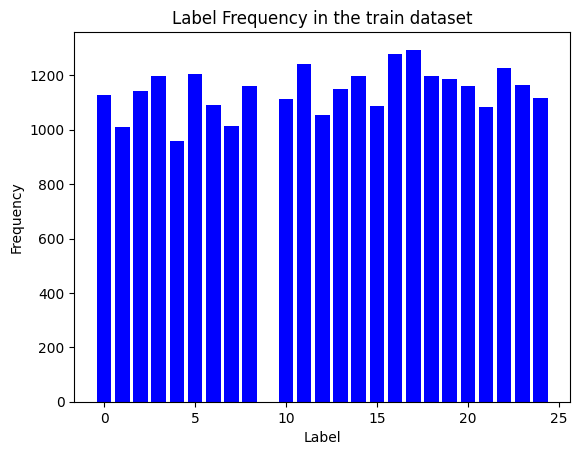

In [ ]:
## Counting the frequency of each label in the train set
lab_counts = y_train.value_counts().sort_index()

plt.bar(lab_counts.index, lab_counts.values, color = 'blue')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency in the train dataset')
plt.show()

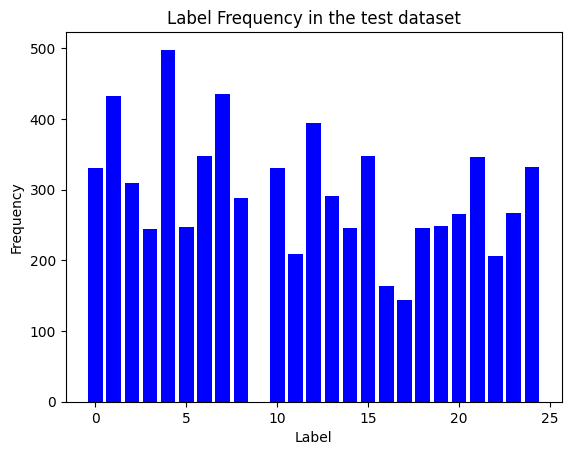

In [ ]:
## frequency in test set
lab_counts = y_test.value_counts().sort_index()

plt.bar(lab_counts.index, lab_counts.values, color = 'blue')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency in the test dataset')
plt.show()

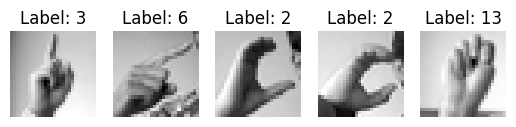

In [ ]:
pixels = train_df.iloc[:, 1:].values
labs = train_df['label'].values

images = pixels.reshape(-1, 28, 28)
num_img_plt = 5

for i in range(num_img_plt):
  plt.subplot(1, num_img_plt, i+1)
  plt.imshow(images[i], cmap = 'gray')
  plt.title(f"Label: {labs[i]}")
  plt.axis('off')

plt.show()

In [ ]:
del train_df['label']
del test_df['label']

In [ ]:

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
print("---------------------------------------")
print("----------- BEFORE RESHAPING ----------")
print("---------------------------------------")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

---------------------------------------
----------- BEFORE RESHAPING ----------
---------------------------------------
x_train shape: (27455, 784)
x_test shape: (7172, 784)
y_train shape: (27455, 24)
y_test shape: (7172, 24)


In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
print("---------------------------------------")
print("----------- AFTER RESHAPING ----------")
print("---------------------------------------")

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

---------------------------------------
----------- AFTER RESHAPING ----------
---------------------------------------
x_train shape: (27455, 28, 28, 1)
x_test shape: (7172, 28, 28, 1)
y_train shape: (27455, 24)
y_test shape: (7172, 24)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))

model.save('smnist.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
## better visualization with confusion matrix
y_pred_prob = model.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)
conf_matrix = confusion_matrix(y_test,y_true= y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            cmap = 'Blues', square= True,  xticklabels=range(25), yticklabels=range(25))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')
plt.show()

225/225 [==============================] - 7s 31ms/step


TypeError: ignored